In [39]:
import os
import yaml
import matplotlib.pyplot as plt
from collections import Counter

# === Load data.yaml ===
with open("../PlantDoc-4/data.yaml", 'r') as f:
    data_yaml = yaml.safe_load(f)

# === Class Names ===
class_names = data_yaml['names']
num_classes = data_yaml['nc']

# === Define label directories explicitly with split names ===
label_dirs = {
    'train': "../PlantDoc-4/train/labels",
    'valid': "../PlantDoc-4/valid/labels",
    'test': "../PlantDoc-4/test/labels"
}

# === Count class occurrences per split ===
split_counts = {split: Counter() for split in label_dirs}
total_counts = Counter()

In [40]:

for split, label_dir in label_dirs.items():
    if not os.path.exists(label_dir):
        print(f"Warning: Label folder not found for {split}: {label_dir}")
        continue
    for file_name in os.listdir(label_dir):
        if file_name.endswith(".txt"):
            with open(os.path.join(label_dir, file_name), 'r') as file:
                for line in file:
                    class_id = int(line.strip().split()[0])
                    split_counts[split][class_id] += 1
                    total_counts[class_id] += 1

# === Function to print distribution nicely ===
def print_distribution(name, counts):
    print(f"\nClass distribution in {name}:")
    for i, cls_name in enumerate(class_names):
        print(f"{cls_name:40s}: {counts.get(i, 0)}")

# === Print all splits ===
for split, counts in split_counts.items():
    print_distribution(split, counts)

# === Print total distribution ===
print_distribution("TOTAL", total_counts)

# === Plotting helper function ===
def plot_distribution(dist, title):
    plt.figure(figsize=(16, 7))
    plt.bar(dist.keys(), dist.values(), color='green')
    plt.title(title, fontsize=14)
    plt.ylabel("Number of Instances")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Class distribution in train:
Apple Scab Leaf                         : 156
Apple leaf                              : 176
Apple rust leaf                         : 162
Bell_pepper leaf spot                   : 301
Bell_pepper leaf                        : 247
Blueberry leaf                          : 755
Cherry leaf                             : 216
Corn Gray leaf spot                     : 72
Corn leaf blight                        : 344
Corn rust leaf                          : 100
Peach leaf                              : 474
Potato leaf early blight                : 11
Potato leaf late blight                 : 301
Potato leaf                             : 228
Raspberry leaf                          : 525
Soyabean leaf                           : 128
Soybean leaf                            : 15
Squash Powdery mildew leaf              : 238
Strawberry leaf                         : 316
Tomato Early blight leaf                : 163
Tomato Septoria leaf spot               : 274
Tomato 

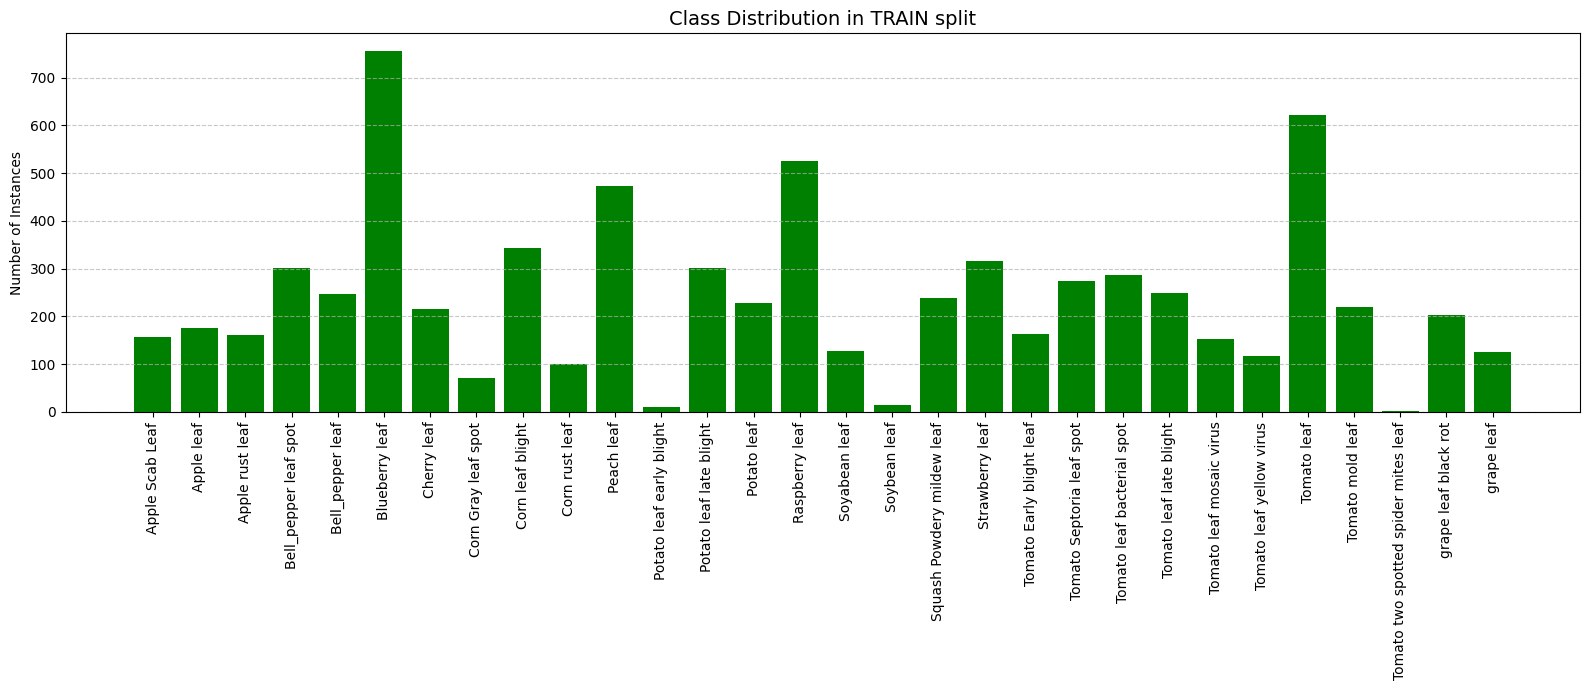

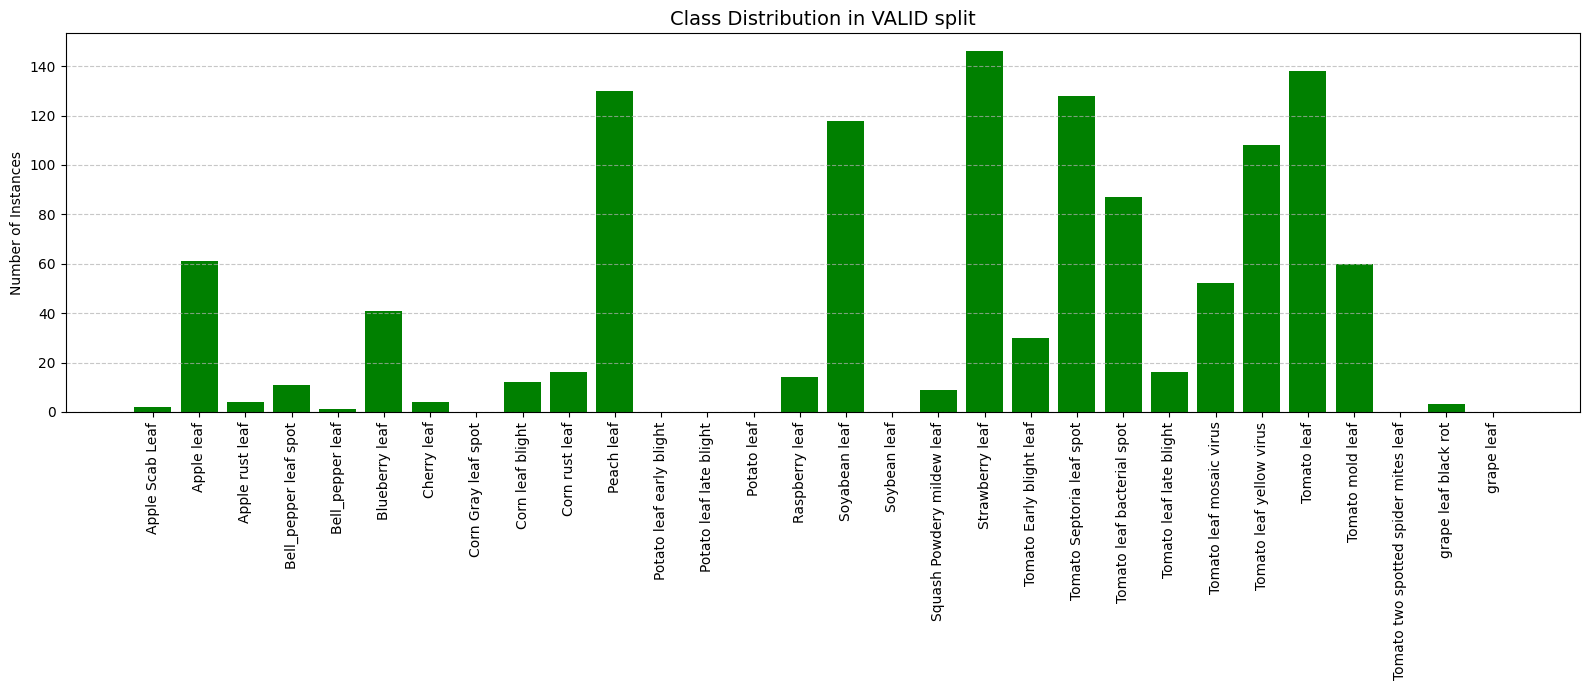

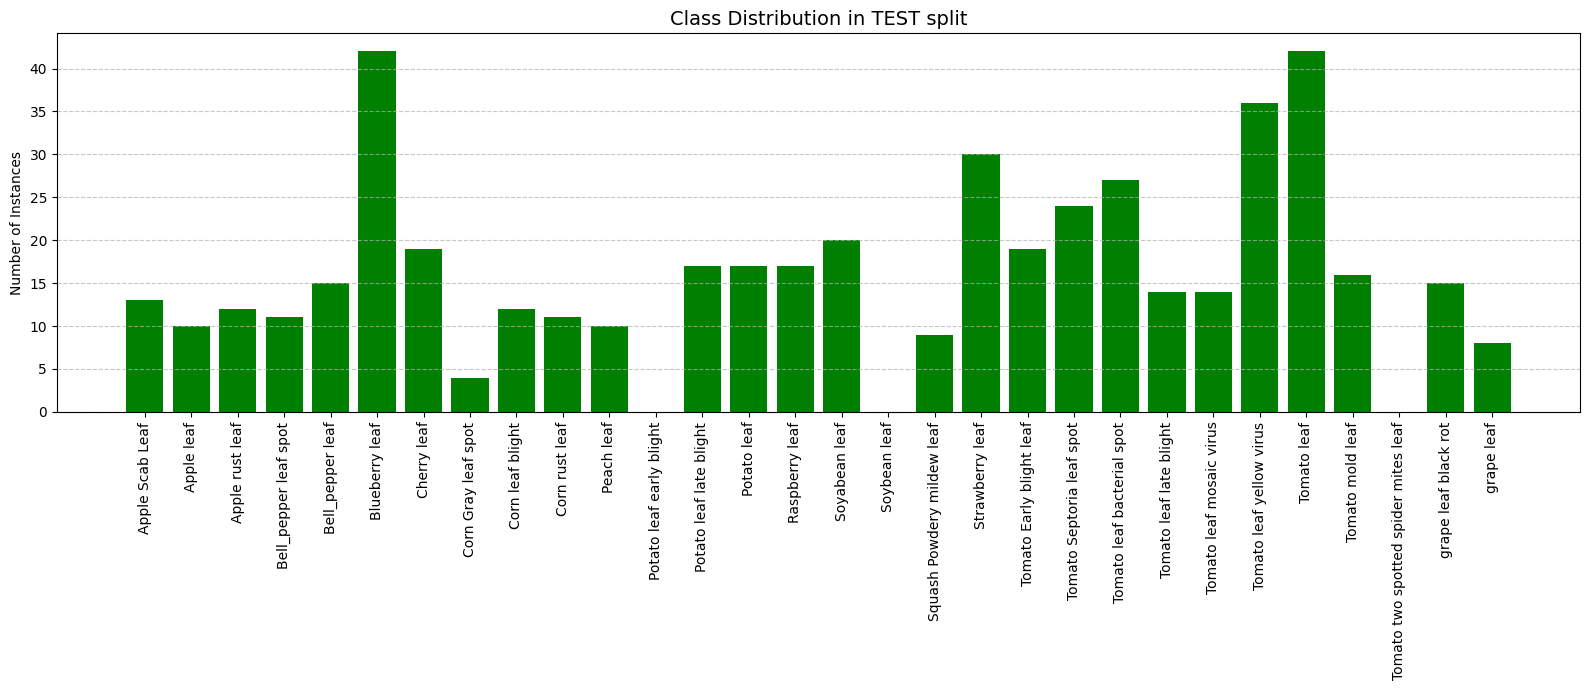

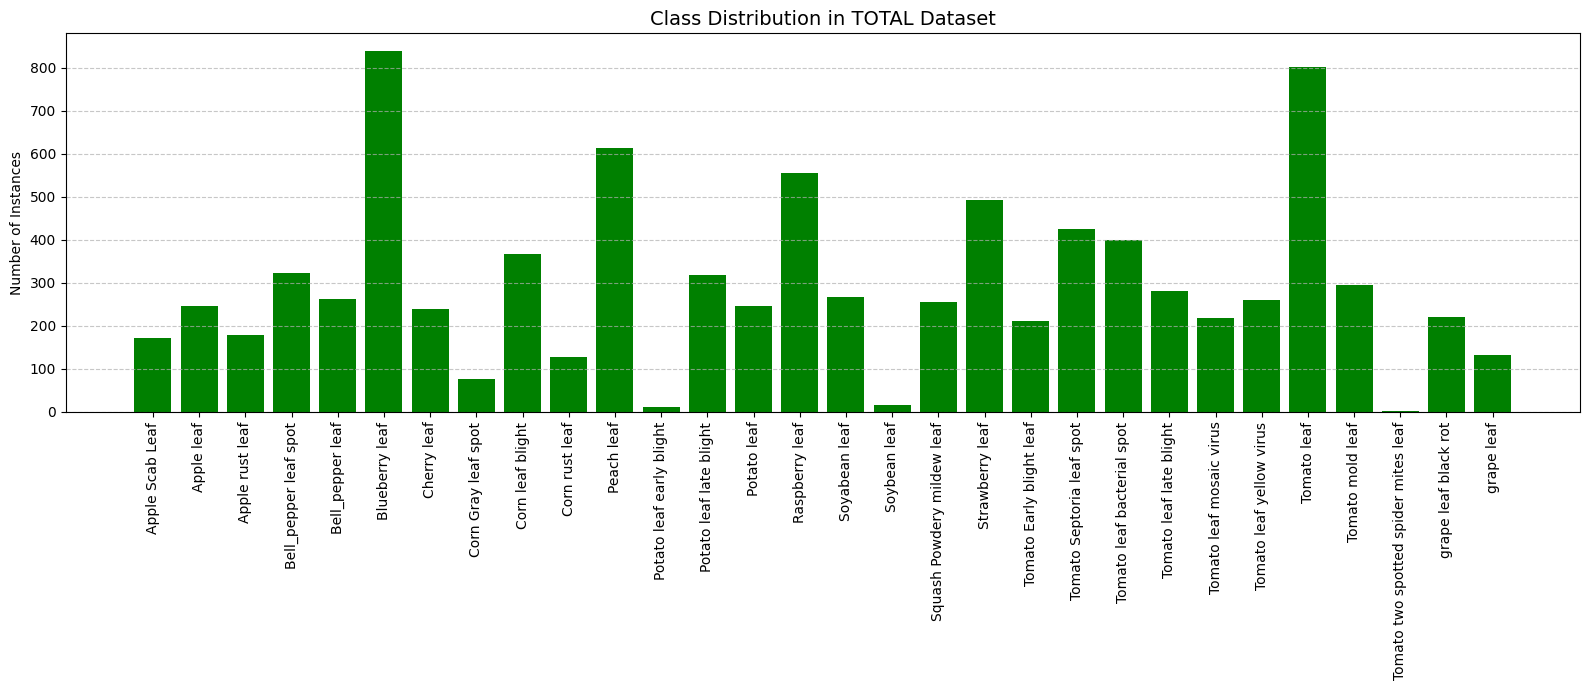

In [41]:

# === Prepare data for plotting ===
for split, counts in split_counts.items():
    dist = {class_names[i]: counts.get(i, 0) for i in range(num_classes)}
    plot_distribution(dist, f"Class Distribution in {split.upper()} split")

# Plot total as well
total_dist = {class_names[i]: total_counts.get(i, 0) for i in range(num_classes)}
plot_distribution(total_dist, "Class Distribution in TOTAL Dataset")
